In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997499e+07,1.997499e+07,False,1.830370e+12,NaN,1,NaN,NaN,None,2026-01-12T17:27:00.000Z,91633.082520,3.883629e+10,166.0624,-0.221154,0.812970,-1.807811,1.763889,-8.570089,-18.743586,1.830370e+12,58.4823,1.924295e+12,None,2026-01-12T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:29:01.857591
1,1027,Ethereum,ETH,ethereum,11379,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206947e+08,1.206947e+08,True,3.754549e+11,NaN,2,NaN,NaN,None,2026-01-12T17:27:00.000Z,3110.781778,1.977824e+10,131.0294,-0.614900,-0.495214,-1.626318,0.349337,-5.897571,-24.539855,3.754549e+11,11.9962,3.754549e+11,None,2026-01-12T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:29:01.857591
2,825,Tether USDt,USDT,tether,166013,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.869664e+11,1.907827e+11,True,1.906431e+11,NaN,3,NaN,NaN,None,2026-01-12T17:27:00.000Z,0.999268,8.292275e+10,92.1757,0.015591,0.073196,-0.043973,-0.105952,-0.026205,-0.126382,1.868296e+11,5.9694,1.906431e+11,None,2026-01-12T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-12 13:29:01.857591
3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.069997e+10,9.998573e+10,False,2.078392e+11,NaN,4,NaN,NaN,None,2026-01-12T17:27:00.000Z,2.078689,3.727535e+09,196.7174,-0.671597,-0.566301,-4.483977,2.865383,-13.211596,-17.449754,1.261764e+11,4.0315,2.078689e+11,None,2026-01-12T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:29:01.857591
4,1839,BNB,BNB,bnb,3068,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377338e+08,1.377338e+08,1.377338e+08,False,1.245970e+11,NaN,5,NaN,NaN,None,2026-01-12T17:27:00.000Z,904.621845,2.067825e+09,13.8773,-0.068536,-0.182077,0.252783,0.937940,-3.872034,-25.792765,1.245970e+11,3.9810,1.245970e+11,None,2026-01-12T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:29:01.857591
5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.645793e+08,6.180915e+08,True,8.812390e+10,NaN,6,5.252369e+08,7.488522e+10,None,2026-01-12T17:27:00.000Z,142.574181,5.746898e+09,129.6608,-0.224392,2.393448,6.012187,7.664168,-4.991502,-29.843396,8.049443e+10,2.5719,8.812390e+10,None,2026-01-12T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:29:01.857591
6,3408,USDC,USDC,usd-coin,36269,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.438340e+10,7.438340e+10,False,7.437488e+10,NaN,7,6.090122e+10,6.089424e+10,None,2026-01-12T17:27:00.000Z,0.999885,1.116037e+10,174.4364,0.016796,0.010171,0.008157,-0.012637,0.015742,0.002142,7.437488e+10,2.3764,7.437488e+10,None,2026-01-12T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-12 13:29:01.857591
7,1958,TRON,TRX,tron,1277,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470415e+10,9.470416e+10,True,2.829010e+10,NaN,8,9.466789e+10,2.827926e+10,None,2026-01-12T17:27:00.000Z,0.298721,5.442887e+08,3.4589,-0.083076,-0.318078,2.205848,9.880887,0.962961,-5.882384,2.829010e+10,0.9039,2.829010e+10,None,2026-01-12T

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\msset\Data-Analysis-Portfolio\API.csv'):
        df.to_csv(r'C:\Users\msset\Data-Analysis-Portfolio\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\msset\Data-Analysis-Portfolio\API.csv', mode='a', header=False)
        
        df = pd.read_csv(r'C:\Users\msset\Data-Analysis-Portfolio\API.csv')



In [6]:
import os 
from time import time
from time import sleep

for i in range(3):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 60 sec

API Runner completed
API Runner completed
API Runner completed


In [ ]:
df72 = pd.read_csv(r'C:\Users\msset\Data-Analysis-Portfolio\API.csv')
df72

In [8]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997499e+07,1.997499e+07,False,1.835894e+12,NaN,1,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,91909.620108,3.830953e+10,167.3189,0.217660,0.983479,-1.905217,2.074236,-8.614842,-18.576312,1.835894e+12,58.5314,1.930102e+12,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
1,1,1027,Ethereum,ETH,ethereum,11379,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206947e+08,1.206947e+08,True,3.771874e+11,NaN,2,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,3125.135895,2.016989e+10,134.4758,-0.130972,-0.097309,-1.814472,0.788441,-5.316382,-24.419570,3.771874e+11,12.0254,3.771874e+11,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
2,2,825,Tether USDt,USDT,tether,166012,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.869664e+11,1.907827e+11,True,1.906148e+11,NaN,3,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,0.999120,8.284517e+10,92.8634,-0.006519,0.049925,-0.061460,-0.106111,-0.051295,-0.150482,1.868018e+11,5.9556,1.906148e+11,NaN,2026-01-12T17:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-12 13:15:09.043069
3,3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.069997e+10,9.998573e+10,False,2.090884e+11,NaN,4,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,2.091182,3.708515e+09,196.2890,-0.187979,-0.149923,-4.535531,3.526706,-12.841199,-17.059437,1.269347e+11,4.0469,2.091182e+11,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
4,4,1839,BNB,BNB,bnb,3068,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377338e+08,1.377338e+08,1.377338e+08,False,1.246397e+11,NaN,5,NaN,NaN,NaN,2026-01-12T17:13:00.000Z,904.931698,2.066410e+09,13.6228,-0.041432,-0.283981,0.062545,0.936921,-4.037191,-26.036147,1.246397e+11,3.9807,1.246397e+11,NaN,2026-01-12T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
5,5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.645793e+08,6.180915e+08,True,8.849725e+10,NaN,6,5.252369e+08,7.520249e+10,NaN,2026-01-12T17:12:00.000Z,143.178229,5.741314e+09,133.8864,0.268794,2.457996,5.813947,7.944255,-4.910595,-29.887213,8.083546e+10,2.5772,8.849725e+10,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
6,6,3408,USDC,USDC,usd-coin,36269,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.438340e+10,7.438340e+10,False,7.437016e+10,NaN,7,6.090122e+10,6.089038e+10,NaN,2026-01-12T17:12:00.000Z,0.999822,1.104673e+10,171.9837,-0.016394,0.005117,0.001749,-0.013961,-0.003109,-0.026160,7.437016e+10,2.3710,7.437016e+10,NaN,2026-01-12T17:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-12 13:15:09.043069
7,7,1958,TRON,TRX,tron,1277,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.470415e+10,9.470416e+10,True,2.830123e+10,NaN,8,9.466789e+10,2.829039e+10,NaN,2026-01-12T17:12:00.000Z,0.298838,5.415889e+08,2.8182,0.045373,-0.255768,2.186713,9.926815,1.018377,-5.905604,2.830123e+10,0.9023,2.830123e+10,NaN

In [9]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19974993.00000,19974993.00000,False,1835894018281.30005,NaN,1,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,91909.62011,38309526579.13483,167.31890,0.21766,0.98348,-1.90522,2.07424,-8.61484,-18.57631,1835894018281.29688,58.53140,1930102022258.88989,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
1,1,1027,Ethereum,ETH,ethereum,11379,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120694718.89010,120694718.89010,True,377187398292.66998,NaN,2,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,3125.13589,20169890426.36517,134.47580,-0.13097,-0.09731,-1.81447,0.78844,-5.31638,-24.41957,377187398292.67212,12.02540,377187398292.66998,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
2,2,825,Tether USDt,USDT,tether,166012,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,186966394629.03696,190782697580.09515,True,190614794048.35001,NaN,3,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,0.99912,82845167519.10316,92.86340,-0.00652,0.04992,-0.06146,-0.10611,-0.05129,-0.15048,186801849739.09225,5.95560,190614794048.35001,NaN,2026-01-12T17:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-12 13:15:09.043069
3,3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60699967552.00000,99985731168.00000,False,209088406402.67999,NaN,4,NaN,NaN,NaN,2026-01-12T17:12:00.000Z,2.09118,3708515161.09462,196.28900,-0.18798,-0.14992,-4.53553,3.52671,-12.84120,-17.05944,126934706941.50368,4.04690,209118245133.76001,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
4,4,1839,BNB,BNB,bnb,3068,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137733808.75000,137733808.75000,137733808.75000,False,124639689486.69000,NaN,5,NaN,NaN,NaN,2026-01-12T17:13:00.000Z,904.93170,2066410151.17915,13.62280,-0.04143,-0.28398,0.06254,0.93692,-4.03719,-26.03615,124639689486.68571,3.98070,124639689486.69000,NaN,2026-01-12T17:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
5,5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,564579286.06701,618091547.62977,True,88497253186.59000,NaN,6,525236893.30000,75202488219.67551,NaN,2026-01-12T17:12:00.000Z,143.17823,5741314476.11205,133.88640,0.26879,2.45800,5.81395,7.94426,-4.91059,-29.88721,80835462343.03893,2.57720,88497253186.59000,NaN,2026-01-12T17:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-12 13:15:09.043069
6,6,3408,USDC,USDC,usd-coin,36269,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,74383398866.03563,74383398866.03563,False,74370158992.97000,NaN,7,60901219650.23000,60890379537.64736,NaN,2026-01-12T17:12:00.000Z,0.99982,11046733210.35392,171.98370,-0.01639,0.00512,0.00175,-0.01396,-0.00311,-0.02616,74370158992.96545,2.37100,74370158992.97000,NaN,2026-01-12T17:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-12 13:15:09.043069
7,7,1958,TRON,TRX,tron,1277,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,94704153120.533

In [11]:
# coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17156,1.06437,-1.77098,1.98879,-8.54237,-18.59149
Ethereum,-0.17942,-0.09792,-1.61347,0.67418,-5.32106,-24.40050
Tether USDt,0.01294,0.06740,-0.04495,-0.09190,-0.04546,-0.13986
XRP,-0.44275,-0.37250,-4.49360,3.17326,-13.05438,-17.36635
BNB,0.00746,-0.15709,0.18252,0.99761,-3.89104,-25.89000
Solana,0.12385,2.44730,5.80571,7.76006,-5.01014,-29.85214
USDC,0.00005,0.01116,0.01106,-0.00427,-0.00395,-0.00925
TRON,-0.04245,-0.29565,2.19936,9.89572,0.99604,-5.97636
Dogecoin,-0.03682,0.16235,-7.53884,-0.26049,-17.74153,-32.13631


In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.17156
              quote.USD.percent_change_24h     1.06437
              quote.USD.percent_change_7d     -1.77098
              quote.USD.percent_change_30d     1.98879
              quote.USD.percent_change_60d    -8.54237
              quote.USD.percent_change_90d   -18.59149
Ethereum      quote.USD.percent_change_1h     -0.17942
              quote.USD.percent_change_24h    -0.09792
              quote.USD.percent_change_7d     -1.61347
              quote.USD.percent_change_30d     0.67418
              quote.USD.percent_change_60d    -5.32106
              quote.USD.percent_change_90d   -24.40050
Tether USDt   quote.USD.percent_change_1h      0.01294
              quote.USD.percent_change_24h     0.06740
              quote.USD.percent_change_7d     -0.04495
              quote.USD.percent_change_30d    -0.09190
              quote.USD.percent_change_60d    -0.04546
              quote.US

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.17156
             quote.USD.percent_change_24h   1.06437
             quote.USD.percent_change_7d   -1.77098
             quote.USD.percent_change_30d   1.98879
             quote.USD.percent_change_60d  -8.54237
             quote.USD.percent_change_90d -18.59149
Ethereum     quote.USD.percent_change_1h   -0.17942
             quote.USD.percent_change_24h  -0.09792
             quote.USD.percent_change_7d   -1.61347
             quote.USD.percent_change_30d   0.67418
             quote.USD.percent_change_60d  -5.32106
             quote.USD.percent_change_90d -24.40050
Tether USDt  quote.USD.percent_change_1h    0.01294
             quote.USD.percent_change_24h   0.06740
             quote.USD.percent_change_7d   -0.04495
             quote.USD.percent_change_30d  -0.09190
             quote.USD.percent_change_60d  -0.04546
             quote.USD.percent_change_90d  -0.13986
XRP          quote.USD.percent_change_1h   -0.44275
             quote.USD.percent_change_24h  -0.37250
             quote.USD.percent_change_7d   -4.49360
             quote.USD.percent_change_30d   3.17326
             quote.USD.percent_change_60d -13.05438
             quote.USD.percent_change_90d -17.36635
BNB          quote.USD.percent_change_1h    0.00746
             quote.USD.percent_change_24h  -0.15709
             quote.USD.percent_change_7d    0.18252
             quote.USD.percent_change_30d   0.99761
             quote.USD.percent_change_60d  -3.89104
             quote.USD.percent_change_90d -25.89000
Solana       quote.USD.percent_change_1h    0.12385
             quote.USD.percent_change_24h   2.44730
             quote.USD.percent_change_7d    5.80571
             quote.USD.percent_change_30d   7.76006
             quote.USD.percent_change_60d  -5.01014
             quote.USD.percent_change_90d -29.85214
USDC         quote.USD.percent_change_1h    0.00005
             quote.USD.percent_change_24h   0.01116
             quote.USD.percent_change_7d    0.01106
             quote.USD.percent_change_30d  -0.00427
             quote.USD.percent_change_60d  -0.00395
             quote.USD.percent_change_90d  -0.00925
TRON         quote.USD.percent_change_1h   -0.04245
             quote.USD.percent_change_24h  -0.29565
             quote.USD.percent_change_7d    2.19936
             quote.USD.percent_change_30d   9.89572
             quote.USD.percent_change_60d   0.99604
             quote.USD.percent_change_90d  -5.97636
Dogecoin     quote.USD.percent_change_1h   -0.03682
             quote.USD.percent_change_24h   0.16235
             quote.USD.percent_change_7d   -7.53884
             quote.USD.percent_change_30d  -0.26049
             quote.USD.percent_change_60d -17.74153
             quote.USD.percent_change_90d -32.13631
Cardano      quote.USD.percent_change_1h    0.08536
             quote.USD.percent_change_24h   0.53267
             quote.USD.percent_change_7d   -3.48742
             quote.USD.percent_change_30d  -3.48966
             quote.USD.percent_change_60d -26.65918
             quote.USD.percent_change_90d -43.58802
Bitcoin Cash quote.USD.percent_change_1h   -0.26368
             quote.USD.percent_change_24h  -5.82645
             quote.USD.percent_change_7d   -4.28013
             quote.USD.percent_change_30d   7.65816
             quote.USD.percent_change_60d  20.13973
             quote.USD.percent_change_90d  15.39789
Monero       quote.USD.percent_change_1h   -0.66578
             quote.USD.percent_change_24h  16.52852
             quote.USD.percent_change_7d   37.03622
             quote.USD.percent_change_30d  41.83261
             quote.USD.percent_change_60d  56.65885
             quote.USD.percent_change_90d  89.73357
Chainlink    quote.USD.percent_change_1h   -0.06514
             quote.USD.percent_change_24h  -0.44380
             quote.USD.percent_change_7d   -2.94150
             quote.USD.percent_change_30d

In [15]:
df5.count()

values    90
dtype: int64

In [20]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17156
1,Bitcoin,quote.USD.percent_change_24h,1.06437
2,Bitcoin,quote.USD.percent_change_7d,-1.77098
3,Bitcoin,quote.USD.percent_change_30d,1.98879
4,Bitcoin,quote.USD.percent_change_60d,-8.54237
5,Bitcoin,quote.USD.percent_change_90d,-18.59149
6,Ethereum,quote.USD.percent_change_1h,-0.17942
7,Ethereum,quote.USD.percent_change_24h,-0.09792
8,Ethereum,quote.USD.percent_change_7d,-1.61347
9,Ethereum,quote.USD.percent_change_30d,0.67418


In [21]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17156
1,Bitcoin,quote.USD.percent_change_24h,1.06437
2,Bitcoin,quote.USD.percent_change_7d,-1.77098
3,Bitcoin,quote.USD.percent_change_30d,1.98879
4,Bitcoin,quote.USD.percent_change_60d,-8.54237
5,Bitcoin,quote.USD.percent_change_90d,-18.59149
6,Ethereum,quote.USD.percent_change_1h,-0.17942
7,Ethereum,quote.USD.percent_change_24h,-0.09792
8,Ethereum,quote.USD.percent_change_7d,-1.61347
9,Ethereum,quote.USD.percent_change_30d,0.67418


In [31]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.17156
1,Bitcoin,24h,1.06437
2,Bitcoin,7d,-1.77098
3,Bitcoin,30d,1.98879
4,Bitcoin,60d,-8.54237
5,Bitcoin,90d,-18.59149
6,Ethereum,1h,-0.17942
7,Ethereum,24h,-0.09792
8,Ethereum,7d,-1.61347
9,Ethereum,30d,0.67418


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

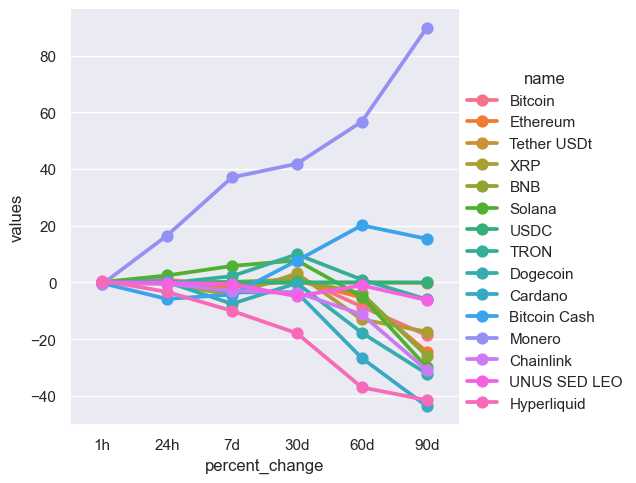

In [37]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [38]:


df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,91909.62011,2026-01-12 13:15:09.043069
15,Bitcoin,91869.34655,2026-01-12 13:16:10.516416
30,Bitcoin,91900.21152,2026-01-12 13:17:12.989727
45,Bitcoin,91900.44728,2026-01-12 13:19:31.414214
60,Bitcoin,91900.44728,2026-01-12 13:20:03.348022
75,Bitcoin,91920.93331,2026-01-12 13:20:35.700862
90,Bitcoin,91920.93331,2026-01-12 13:21:08.273961
105,Bitcoin,91954.60978,2026-01-12 13:21:40.209328
120,Bitcoin,91954.60978,2026-01-12 13:22:12.651591
135,Bitcoin,91929.06168,2026-01-12 13:23:46.564250


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

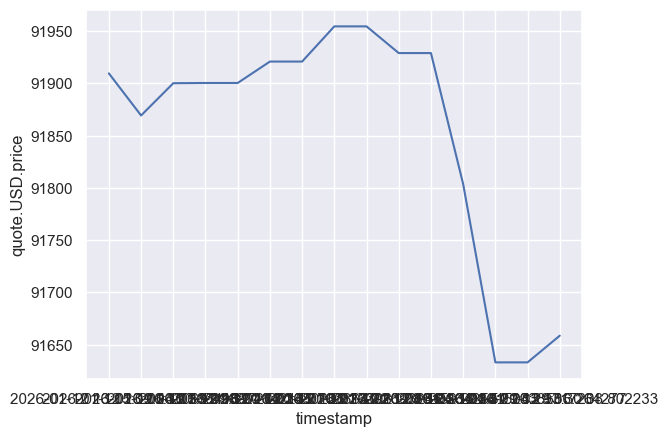

In [39]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)